In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['SimHei']
%matplotlib inline
plt.style.use('bmh')
import warnings
warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv(r"./AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [39]:
# Order列理论上没有任何信息，删除
df = df.drop(columns=['Order'])

有缺失值的列的比例：0.3333333333333333
缺失值统计：
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


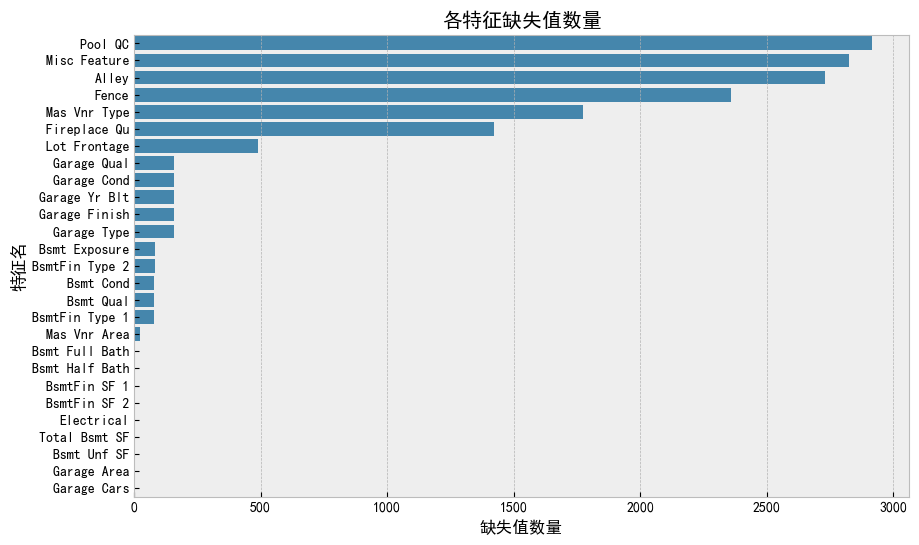

数据集总行数: 2930
重复行数: 0

各变量类型统计：
object     43
int64      27
float64    11
Name: count, dtype: int64

各变量类型详情：
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 81, dtype: object

数值型变量(37): ['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']

分类型变量(4

In [40]:
# 1. 查看缺失值情况
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(f'有缺失值的列的比例：{len(missing)/len(df.columns)}')
print("缺失值统计：")
print(missing)

# 2. 缺失值比例可视化
plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, orient='h')
plt.title('各特征缺失值数量')
plt.xlabel('缺失值数量')
plt.ylabel('特征名')
plt.show()

# 3. 查看重复值
print(f"数据集总行数: {df.shape[0]}")
print(f"重复行数: {df.duplicated().sum()}")

# 如果有重复行，可以选择删除
df = df.drop_duplicates()

# 4. 查看变量类型
print("\n各变量类型统计：")
print(df.dtypes.value_counts())
print("\n各变量类型详情：")
print(df.dtypes)

# 5. 数值型和分类型变量分离
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('SalePrice') # 删除目标变量，因为目标变量不能作为特征
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\n数值型变量({len(num_cols)}): {num_cols}")
print(f"\n分类型变量({len(cat_cols)}): {cat_cols}")

Pool QC 填充为 None
Fireplace Qu 填充为 None
Alley 填充为 None
Fence 填充为 None
Misc Feature 填充为 None
Garage Qual 填充为 None
Garage Cond 填充为 None
Garage Yr Blt 填充为 0
Garage Finish 填充为 None
Garage Type 填充为 None
Bsmt Exposure 填充为 None
BsmtFin Type 1 填充为 None
BsmtFin Type 2 填充为 None
Bsmt Cond 填充为 None
Bsmt Qual 填充为 None
Mas Vnr Type 填充为 None
Mas Vnr Area 填充为 0
有缺失值的列的比例：0.12345679012345678
缺失值统计：
Lot Frontage      490
Bsmt Half Bath      2
Bsmt Full Bath      2
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Electrical          1
Total Bsmt SF       1
Garage Cars         1
Garage Area         1
dtype: int64


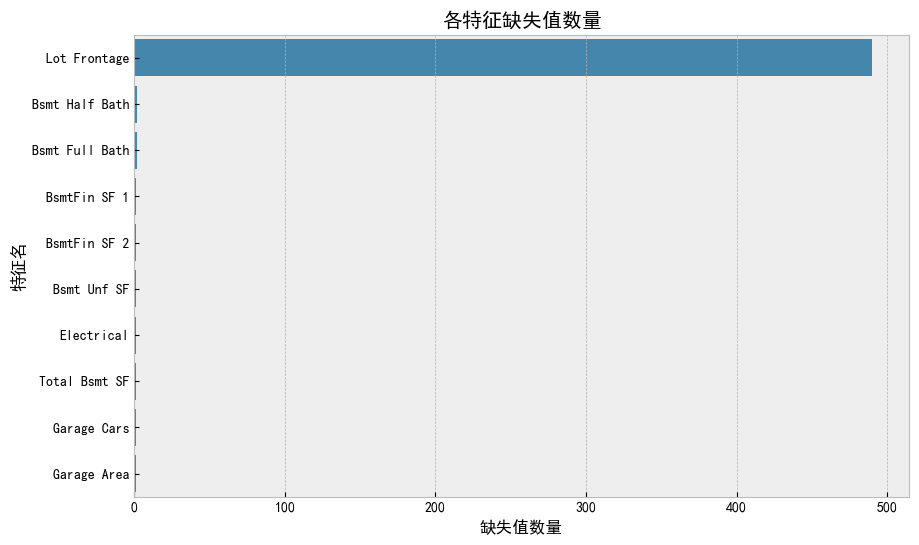

In [41]:
# 缺失值处理，一部分缺失值本身就反映信息，需要多添加一个水平，有些可以填充
# 这些变量的缺失值本身就代表“没有该设施”
missing_meaningful_cols = [
    'Pool QC', 'Fireplace Qu', 'Alley', 'Fence', 'Misc Feature',
    'Garage Qual', 'Garage Cond', 'Garage Yr Blt', 'Garage Finish', 'Garage Type',
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Cond', 'Bsmt Qual',
    'Mas Vnr Type', 'Mas Vnr Area'
]
# 先处理类别型,再处理数值型,因为数值型可能存在0,而类别型不存在0,所以先处理类别型
for col in missing_meaningful_cols:
    if col in cat_cols:
        print(f'{col} 填充为 None')
        df[col] = df[col].fillna('None')
    elif col in num_cols:
        print(f'{col} 填充为 0')
        df[col] = df[col].fillna(0)
    else:
        print(f'{col} 未处理')

# 再查看缺失值情况
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(f'有缺失值的列的比例：{len(missing)/len(df.columns)}')
print("缺失值统计：")
print(missing)

# 缺失值比例可视化
plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index, orient='h')
plt.title('各特征缺失值数量')
plt.xlabel('缺失值数量')
plt.ylabel('特征名')
plt.show()

In [42]:

# === 新增：删除缺失值占比超过30%的特征列 ===
thresh = 0.3  # 阈值
missing_ratio = df.isnull().mean()
drop_cols = missing_ratio[missing_ratio > thresh].index.tolist()
print(f"\n将要删除的缺失值占比超过30%的列: {drop_cols}")
df = df.drop(columns=drop_cols)



将要删除的缺失值占比超过30%的列: []


In [43]:
# === 新增：划分训练集和测试集（在缺失值填充之前） ===
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
print(f"\n训练集样本数: {train_df.shape[0]}, 测试集样本数: {test_df.shape[0]}")


训练集样本数: 2051, 测试集样本数: 879


In [44]:

# 2. 计算训练集的中位数和众数
num_median = train_df[num_cols].median()
print(num_median)
cat_mode = train_df[cat_cols].mode().iloc[0]  # mode()返回DataFrame，取第一行
print(cat_mode)

# 3. 用训练集统计量填充缺失值
# 训练集
train_df[num_cols] = train_df[num_cols].fillna(num_median)
train_df[cat_cols] = train_df[cat_cols].fillna(cat_mode)
# 测试集
test_df[num_cols] = test_df[num_cols].fillna(num_median)
test_df[cat_cols] = test_df[cat_cols].fillna(cat_mode)


PID                535454050.0
MS SubClass               50.0
Lot Frontage              68.0
Lot Area                9360.0
Overall Qual               6.0
Overall Cond               5.0
Year Built              1972.0
Year Remod/Add          1992.0
Mas Vnr Area               0.0
BsmtFin SF 1             375.5
BsmtFin SF 2               0.0
Bsmt Unf SF              460.0
Total Bsmt SF            988.0
1st Flr SF              1082.0
2nd Flr SF                 0.0
Low Qual Fin SF            0.0
Gr Liv Area             1440.0
Bsmt Full Bath             0.0
Bsmt Half Bath             0.0
Full Bath                  2.0
Half Bath                  0.0
Bedroom AbvGr              3.0
Kitchen AbvGr              1.0
TotRms AbvGrd              6.0
Fireplaces                 1.0
Garage Yr Blt           1977.0
Garage Cars                2.0
Garage Area              478.0
Wood Deck SF               0.0
Open Porch SF             26.0
Enclosed Porch             0.0
3Ssn Porch                 0.0
Screen P

In [45]:
# # 7. 简单异常值检测（以Z-score为例）
# from scipy.stats import zscore
# z_scores = zscore(df[num_cols])
# outliers = (abs(z_scores) > 3).sum(axis=0)
# print("\n每个数值型变量的异常值数量（Z-score>3）：")
# for col, count in zip(num_cols, outliers):
#     print(f"{col}: {count}")

# 统计训练集和测试集的缺失值和重复行
print("训练集缺失值总数：", train_df.isnull().sum().sum())
print("训练集重复行数：", train_df.duplicated().sum())
print("测试集缺失值总数：", test_df.isnull().sum().sum())
print("测试集重复行数：", test_df.duplicated().sum())

训练集缺失值总数： 0
训练集重复行数： 0
测试集缺失值总数： 0
测试集重复行数： 0


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


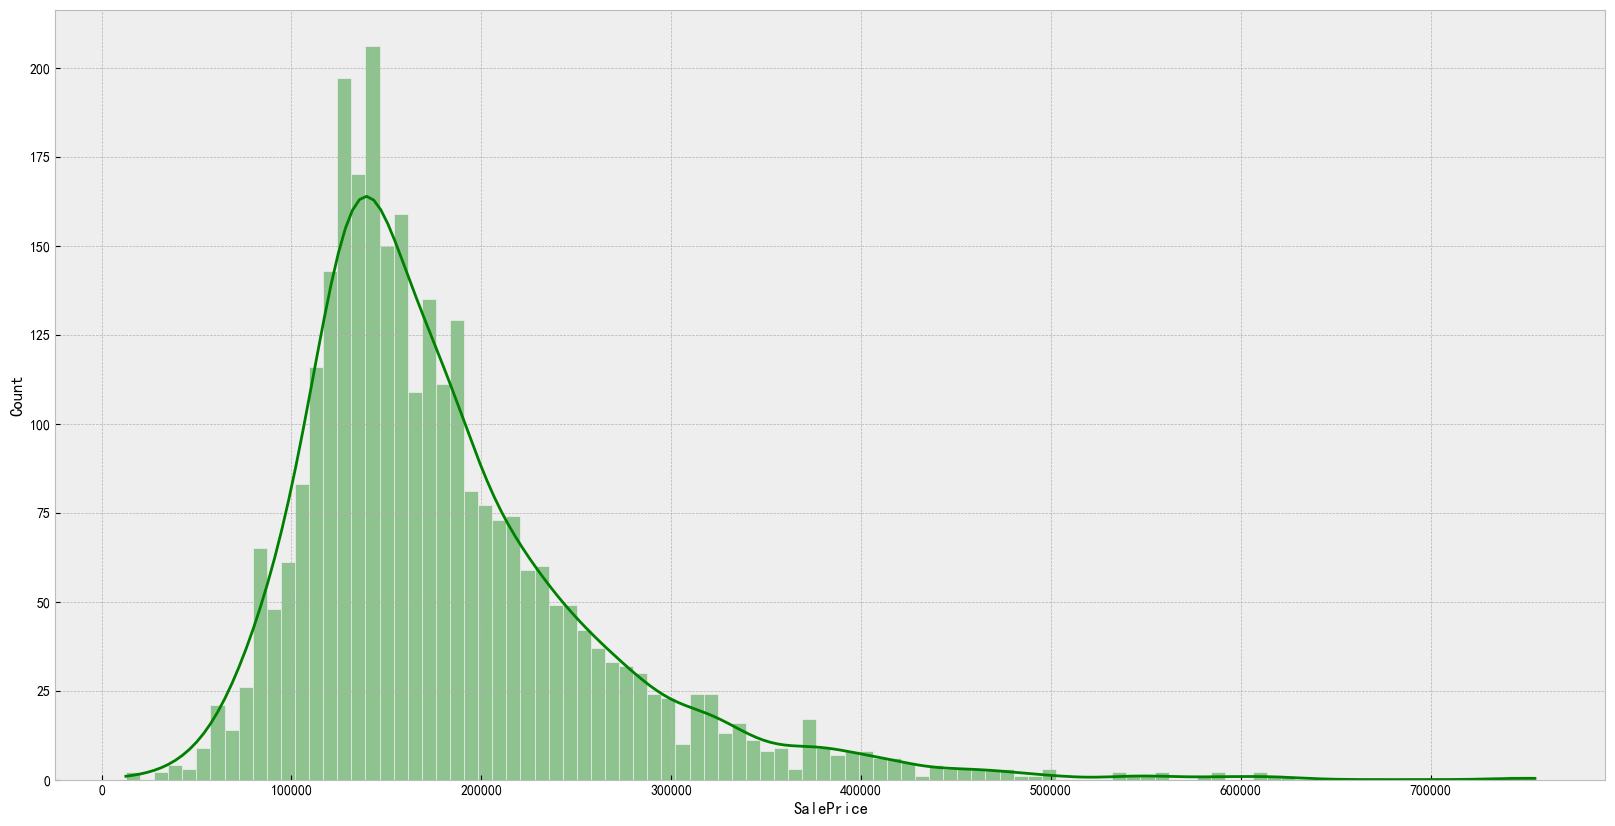

In [46]:
print(df['SalePrice'].describe())
plt.figure(figsize=(20, 10))
sns.histplot(df['SalePrice'], color='g', bins=100, alpha=0.4, kde=True)
plt.show()

In [47]:
# 检查测试集是否存在“未知标签”，后续要注意处理
for col in cat_cols:
    train_levels = set(train_df[col].dropna().unique())
    test_levels = set(test_df[col].dropna().unique())
    unknown_levels = test_levels - train_levels
    if unknown_levels:
        print(f"特征 {col} 测试集有未知类别。")

特征 Roof Matl 测试集有未知类别。
特征 Exterior 1st 测试集有未知类别。
特征 Exterior 2nd 测试集有未知类别。
特征 Kitchen Qual 测试集有未知类别。
特征 Pool QC 测试集有未知类别。
特征 Misc Feature 测试集有未知类别。
特征 Sale Type 测试集有未知类别。


In [48]:
# 目标条件均值编码
mean_cols = []
for col in cat_cols:
    means = train_df.groupby(col)['SalePrice'].mean()
    new_col = col + '_mean'
    mean_cols.append(new_col)
    train_df[new_col] = train_df[col].map(means)
    # 测试集未知类别用训练集全局均值
    global_mean = train_df['SalePrice'].mean()
    test_df[new_col] = test_df[col].map(means).fillna(global_mean)

In [49]:
# 频率编码
freq_cols = []
for col in cat_cols:
    freqs = train_df[col].value_counts(normalize=True)
    new_col = col + '_freq'
    freq_cols.append(new_col)
    train_df[new_col] = train_df[col].map(freqs)
    test_df[new_col] = test_df[col].map(freqs).fillna(0)

In [50]:
# 2. 打印非数值型变量的训练集水平数（即唯一值数量)
print("非数值型变量及其水平数：")
for col in cat_cols:
    print(f"{col}: 水平分别为{train_df[col].unique()}，共{train_df[col].nunique()} 个水平")

非数值型变量及其水平数：
MS Zoning: 水平分别为['RH' 'RL' 'RM' 'FV' 'I (all)' 'C (all)' 'A (agr)']，共7 个水平
Street: 水平分别为['Pave' 'Grvl']，共2 个水平
Alley: 水平分别为['None' 'Pave' 'Grvl']，共3 个水平
Lot Shape: 水平分别为['Reg' 'IR1' 'IR2' 'IR3']，共4 个水平
Land Contour: 水平分别为['HLS' 'Low' 'Lvl' 'Bnk']，共4 个水平
Utilities: 水平分别为['AllPub' 'NoSewr' 'NoSeWa']，共3 个水平
Lot Config: 水平分别为['Inside' 'Corner' 'CulDSac' 'FR2' 'FR3']，共5 个水平
Land Slope: 水平分别为['Gtl' 'Sev' 'Mod']，共3 个水平
Neighborhood: 水平分别为['Crawfor' 'ClearCr' 'Gilbert' 'Blueste' 'Blmngtn' 'OldTown' 'Edwards'
 'Mitchel' 'Sawyer' 'NridgHt' 'BrkSide' 'NAmes' 'Somerst' 'CollgCr'
 'SWISU' 'BrDale' 'NPkVill' 'MeadowV' 'NWAmes' 'IDOTRR' 'Timber' 'NoRidge'
 'SawyerW' 'StoneBr' 'Greens' 'Veenker' 'Landmrk' 'GrnHill']，共28 个水平
Condition 1: 水平分别为['Norm' 'Feedr' 'Artery' 'RRAn' 'PosA' 'PosN' 'RRAe' 'RRNn' 'RRNe']，共9 个水平
Condition 2: 水平分别为['Norm' 'RRNn' 'RRAe' 'PosA' 'Feedr' 'PosN' 'Artery' 'RRAn']，共8 个水平
Bldg Type: 水平分别为['Duplex' '1Fam' 'TwnhsE' '2fmCon' 'Twnhs']，共5 个水平
House Style: 水平分别为['2St

In [51]:
# 用编码映射对有序变量进行编码
order_cols = []
# 质量/条件类（含None）
qual_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
# Land Slope
land_slope_map = {'None': 0, 'Gtl': 1, 'Mod': 2, 'Sev': 3}
# Lot Shape
lot_shape_map = {'None': 0, 'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}
# Bsmt Exposure
bsmt_exposure_map = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
# Garage Finish
garage_finish_map = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
# Paved Drive
paved_drive_map = {'None': 0, 'N': 1, 'P': 2, 'Y': 3}

# 以train_df和test_df为例
for col, mapping in [
    ('Exter Qual', qual_map),
    ('Exter Cond', qual_map),
    ('Bsmt Qual', qual_map),
    ('Bsmt Cond', qual_map),
    ('Heating QC', qual_map),
    ('Kitchen Qual', qual_map),
    ('Fireplace Qu', qual_map),
    ('Garage Qual', qual_map),
    ('Garage Cond', qual_map),
    ('Pool QC', qual_map),
    ('Land Slope', land_slope_map),
    ('Lot Shape', lot_shape_map),
    ('Bsmt Exposure', bsmt_exposure_map),
    ('Garage Finish', garage_finish_map),
    ('Paved Drive', paved_drive_map),
]:
    if col in train_df.columns:
        new_col = col + '_ord'
        order_cols.append(new_col)
        train_df[new_col] = train_df[col].map(mapping)
        test_df[new_col] = test_df[col].map(mapping)
    else:
        print(f"特征 {col} 不存在于训练集中")

In [52]:
train_df.columns.tolist()

['PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'G

In [53]:
from scipy.stats import rankdata
import numpy as np

def rank_minmax_encode(train_df, test_df, cols, suffix='_rank'):
    '''
    对数值型变量或者已转化为数值型的分类型变量进行秩编码和min-
    max归一化，并返回训练集和测试集的编码结果，因为只要是数就可以这样做
    返回只包含新特征的DataFrame，便于后续拼接。
    '''
    train_encoded = pd.DataFrame(index=train_df.index)
    test_encoded = pd.DataFrame(index=test_df.index)
    for col in cols:
        # 训练集秩编码
        train_ranks = rankdata(train_df[col], method='average')  # 从1开始
        min_rank = train_ranks.min()
        max_rank = train_ranks.max()
        # 归一化
        train_encoded[col + suffix] = (train_ranks - min_rank) / (max_rank - min_rank)
        
        # 测试集秩编码
        test_ranks = []
        train_col = train_df[col].values
        for val in test_df[col]:
            # 合并训练集和当前测试样本，计算秩
            concat = np.append(train_col, val)
            rank = rankdata(concat, method='average')[-1]  # 取最后一个（即测试样本的秩）
            # 用训练集的min/max归一化
            norm_rank = (rank - min_rank) / (max_rank - min_rank)
            test_ranks.append(norm_rank)
        test_encoded[col + suffix] = test_ranks
    return train_encoded, test_encoded

rank_cols = num_cols + mean_cols + freq_cols
train_ranked, test_ranked = rank_minmax_encode(train_df, test_df, rank_cols)
print("数值型变量与已转化为数值型的分类型变量已完成秩编码和min-max归一化。")

数值型变量与已转化为数值型的分类型变量已完成秩编码和min-max归一化。


In [54]:
from sklearn.preprocessing import StandardScaler
# 去掉原始cat_cols
train_df = train_df.drop(columns=cat_cols)
test_df = test_df.drop(columns=cat_cols)

scaler_num = StandardScaler()
# 标准化时只用训练集的均值和方差，测试集用训练集参数变换，防止信息泄露。
train_df[num_cols] = scaler_num.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler_num.transform(test_df[num_cols])

scaler_mean = StandardScaler()
train_df[mean_cols] = scaler_mean.fit_transform(train_df[mean_cols])
test_df[mean_cols] = scaler_mean.transform(test_df[mean_cols])

scaler_freq = StandardScaler()
train_df[freq_cols] = scaler_freq.fit_transform(train_df[freq_cols])
test_df[freq_cols] = scaler_freq.transform(test_df[freq_cols])

scaler_ord = StandardScaler()
train_df[order_cols] = scaler_ord.fit_transform(train_df[order_cols])
test_df[order_cols] = scaler_ord.transform(test_df[order_cols])

In [55]:
train_df = pd.concat([train_df, train_ranked], axis=1)
test_df = pd.concat([test_df, test_ranked], axis=1)

In [56]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 2210 to 860
Columns: 262 entries, PID to Sale Condition_freq_rank
dtypes: float64(261), int64(1)
memory usage: 4.1 MB
<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 1357 to 342
Columns: 262 entries, PID to Sale Condition_freq_rank
dtypes: float64(261), int64(1)
memory usage: 1.8 MB


In [57]:
# 检查是不是所有变量都为数值型了
# 检查训练集
cat_cols_left = train_df.select_dtypes(include=['object']).columns.tolist()
print("训练集剩余的非数值型变量：", cat_cols_left)

# 检查测试集
cat_cols_left_test = test_df.select_dtypes(include=['object']).columns.tolist()
print("测试集剩余的非数值型变量：", cat_cols_left_test)

训练集剩余的非数值型变量： []
测试集剩余的非数值型变量： []


In [58]:
# 把因变量换到最后
# 对训练集
sale_col = 'SalePrice'
cols = [col for col in train_df.columns if col != sale_col] + [sale_col]
train_df = train_df[cols]

# 对测试集（如果有SalePrice）
if sale_col in test_df.columns:
    cols_test = [col for col in test_df.columns if col != sale_col] + [sale_col]
    test_df = test_df[cols_test]

In [59]:
# 导出为csv
train_df.to_csv('./train.csv', index=False)
test_df.to_csv('./test.csv', index=False)